In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, make_classification
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from imblearn.over_sampling import SMOTE


In [3]:
data = pd.read_csv("modelling_data.csv")

In [4]:
# Define target variable (y) and other varibles (X)
y = data['Loan Status']
X = data.drop(['Loan Status', "Loan ID", "Customer ID"], axis = 1)

# Split dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

# Show the data split in numbers
shape_dict = {'shape of whole dataset': data.shape, 'shape of train_X': train_X.shape, 'shape of test_X': test_X.shape, 'shape of train_y': train_y.shape, 'shape of test_y': test_y.shape}
for i, v in shape_dict.items(): 
    print(i, v)

shape of whole dataset (20371, 19)
shape of train_X (13648, 16)
shape of test_X (6723, 16)
shape of train_y (13648,)
shape of test_y (6723,)


In [5]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
smote_X, smote_y = sm.fit_resample(train_X, train_y)

smote_y.value_counts()

Loan Status
0    10393
1    10393
Name: count, dtype: int64

# Data modeling

In [8]:
# Load classifiers and split dataset in training and testing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Fit the classifiers using the training dataset
classifiers = {"RF": {"f": RandomForestClassifier(random_state=42)},
               "DT": {"f": DecisionTreeClassifier(random_state=42)},
               "LR": {"f": LogisticRegression(solver = 'liblinear', random_state=42)}}

for model in classifiers.keys():
    # Fit
    classifiers[model]["f"].fit(smote_X, smote_y)
    # Predict
    classifiers[model]["c"] = classifiers[model]["f"].predict(test_X)
    classifiers[model]["p"] = classifiers[model]["f"].predict_proba(test_X)
    classifiers[model]["p_train"] = classifiers[model]["f"].predict_proba(smote_X)

# Evaluation of the preformance and results

In [9]:
# Evaluate the performance
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
measures = {"f1": f1_score, "pre": precision_score, 
            "rec": recall_score, "acc": accuracy_score}
results = pd.DataFrame(columns=measures.keys())

# Evaluate each model in classifiers
for model in classifiers.keys():
    results.loc[model] = [measures[measure](test_y, classifiers[model]["c"]) for measure in measures.keys()]

results

,f1,pre,rec,acc
RF,0.446173,0.624284,0.347134,0.798751
DT,0.441135,0.394671,0.500000,0.704150
LR,0.437517,0.376088,0.522930,0.686003


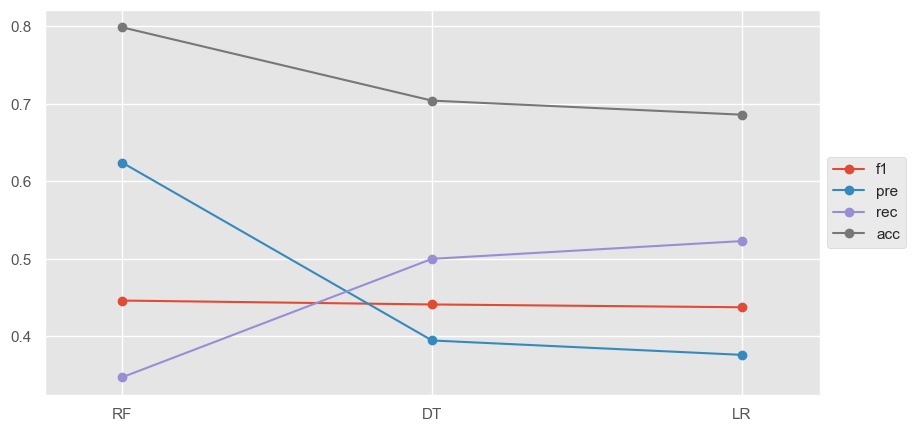

In [10]:
# Plot the results
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.style.use('ggplot')

figsize(10, 5)
ax = plt.subplot(111)

ind = np.arange(results.shape[0])
width = 0.2
l = ax.plot(ind, results, "-o")
plt.legend(iter(l), results.columns.tolist(), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim([-0.25, ind[-1]+.25])
ax.set_xticks(ind)
ax.set_xticklabels(results.index)
plt.show()